In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
X[:5], y[:5]

(array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
         -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
         -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
         -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
        [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
          0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
        [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
          0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]]),
 array([151.,  75., 141., 206., 135.]))

In [12]:
# Convert the target variable to binary (1 for diabetes, 0 for no diabetes)
y_binary = (y > np.median(y)).astype(int)
y_binary[:5]

array([1, 0, 1, 1, 0])

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
	X, y_binary, test_size=0.2, random_state=42)

In [14]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 73.03%


Confusion Matrix:
 [[36 13]
 [11 29]]


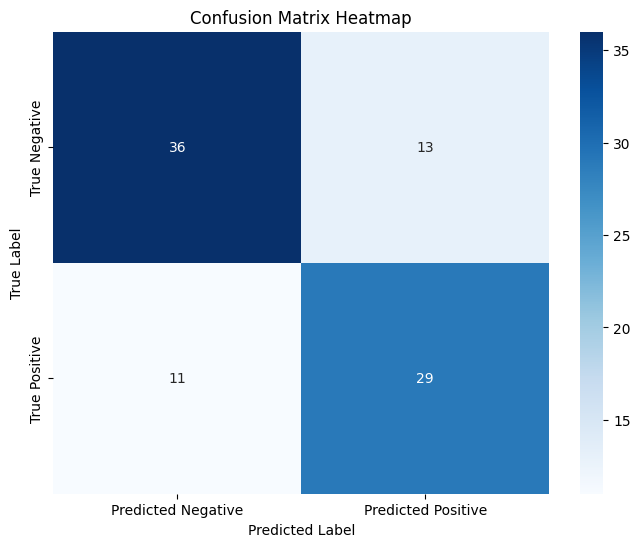

In [18]:
# evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
plt.title('Confusion Matrix Heatmap')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [20]:
# Create a mesh grid for the feature space
x_min, x_max = X_test[:, 0].min() - 0.1, X_test[:, 0].max() + 0.1
y_min, y_max = X_test[:, 1].min() - 0.1, X_test[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

In [26]:
# Create a mesh grid for the selected features (feature_1 and feature_2)
x_min, x_max = X_test[:, 0].min() - 0.1, X_test[:, 0].max() + 0.1  # feature_1
y_min, y_max = X_test[:, 1].min() - 0.1, X_test[:, 1].max() + 0.1  # feature_2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict probabilities on the grid for feature_1 and feature_2
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel(), np.zeros((xx.size, 8))])[:, 1]  # Fill other features with zeros
Z = Z.reshape(xx.shape)  # Reshape to match the grid shape

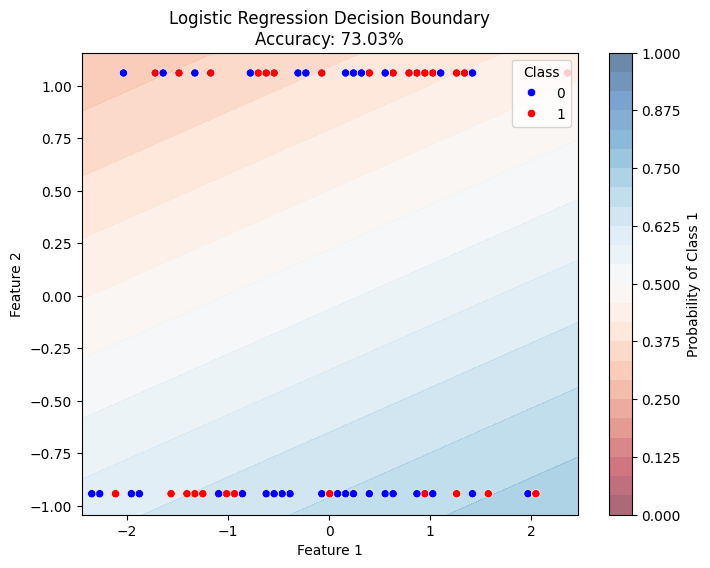

In [27]:
# Plotting the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=np.linspace(0, 1, 25), cmap="RdBu", alpha=0.6)
plt.colorbar(label='Probability of Class 1')

# Scatter plot of the actual data points using feature_1 and feature_2
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette={0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("Feature 1")  # Change as per your feature names
plt.ylabel("Feature 2")  # Change as per your feature names
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(accuracy * 100))
plt.legend(title="Class", loc="upper right")
plt.show()